## t-test 연습 2.

데이터 셋: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores

위 데이터 셋은 넷플릭스 오리지널 시리즈의 메타 데이터와 평점을 담은 데이터 셋입니다. 지금까지 배운 시각화와 통계 기법들을 활용하여 넷플릭스의 데이터 분석가가 되었다고 생각하고 데이터를 통해서 인사이트를 전달해보세요.

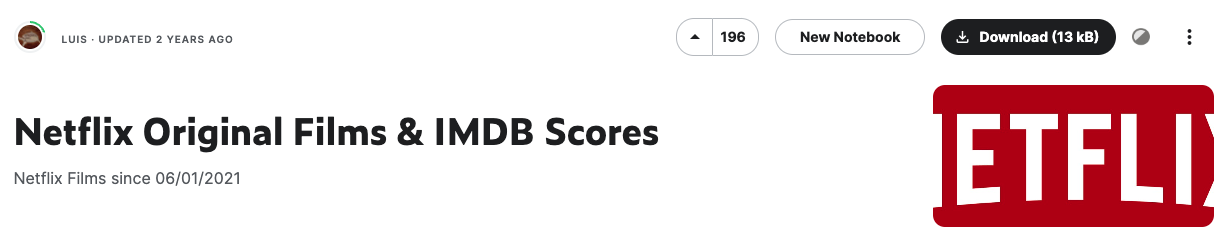

## 요구 사항
- 기본적인 EDA와 시각화를 해주세요. 
- t-test 기법을 다양하게 사용해보세요.
- 통계적 근거를 활용하여 오리지널 시리즈 제작 방향에 대한 제언을 해보세요. 
- 결과물을 velog에 기록해주세요. (선택)

## EDA

## 데이터 불러오기

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [139]:
# pd.read_csv("./data/NetflixOriginals.csv", encoding="latin1")
df = pd.read_csv("./data/NetflixOriginals.csv", encoding="ISO-8859-1")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [140]:
df.shape

(584, 6)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [142]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [143]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [144]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

### 날짜 나누기 + 맵핑

In [145]:
df['Premiere'] = pd.to_datetime(df['Premiere'], format='mixed')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [146]:
df['month'] = df['Premiere'].dt.month
df['year'] = df['Premiere'].dt.year
df['day'] = df['Premiere'].dt.dayofweek
df['date_day'] = df['Premiere'].dt.day
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,5
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,26
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,19
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30
...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8


In [147]:
dmap = {0: 'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df['day of week'] = df['day'].map(dmap)
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,day of week
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,5,Mon
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21,Fri
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,26,Thurs
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,19,Fri
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30,Fri
...,...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31,Mon
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9,Fri
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16,Sun
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8,Tues


In [148]:
Mmap = {1: 'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['month_map'] = df['month'].map(Mmap)
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,day of week,month_map
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,8,2019,0,5,Mon,Aug
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,8,2020,4,21,Fri,Aug
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,12,2019,3,26,Thurs,Dec
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,1,2018,4,19,Fri,Jan
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,10,2020,4,30,Fri,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31,Mon,Dec
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9,Fri,Oct
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16,Sun,Dec
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8,Tues,Dec


## Visualisation

#### 장르 확인

In [12]:
df["Genre"]

0                Documentary
1                   Thriller
2      Science fiction/Drama
3            Horror thriller
4                    Mystery
               ...          
579             Concert Film
580              Documentary
581             One-man show
582              Documentary
583              Documentary
Name: Genre, Length: 584, dtype: object

In [13]:
genre = df.sort_values(
    by=["Genre"], 
    ascending=False
)[["Genre"]].drop_duplicates().reset_index()

genre

,index,Genre
0,194,Zombie/Heist
1,237,Western
2,219,War-Comedy
3,553,War drama
4,497,War
...,...,...
110,450,Action-thriller
111,507,Action-adventure
112,318,Action thriller
113,61,Action comedy


### 장르별 작품수

<Axes: xlabel='Genre'>

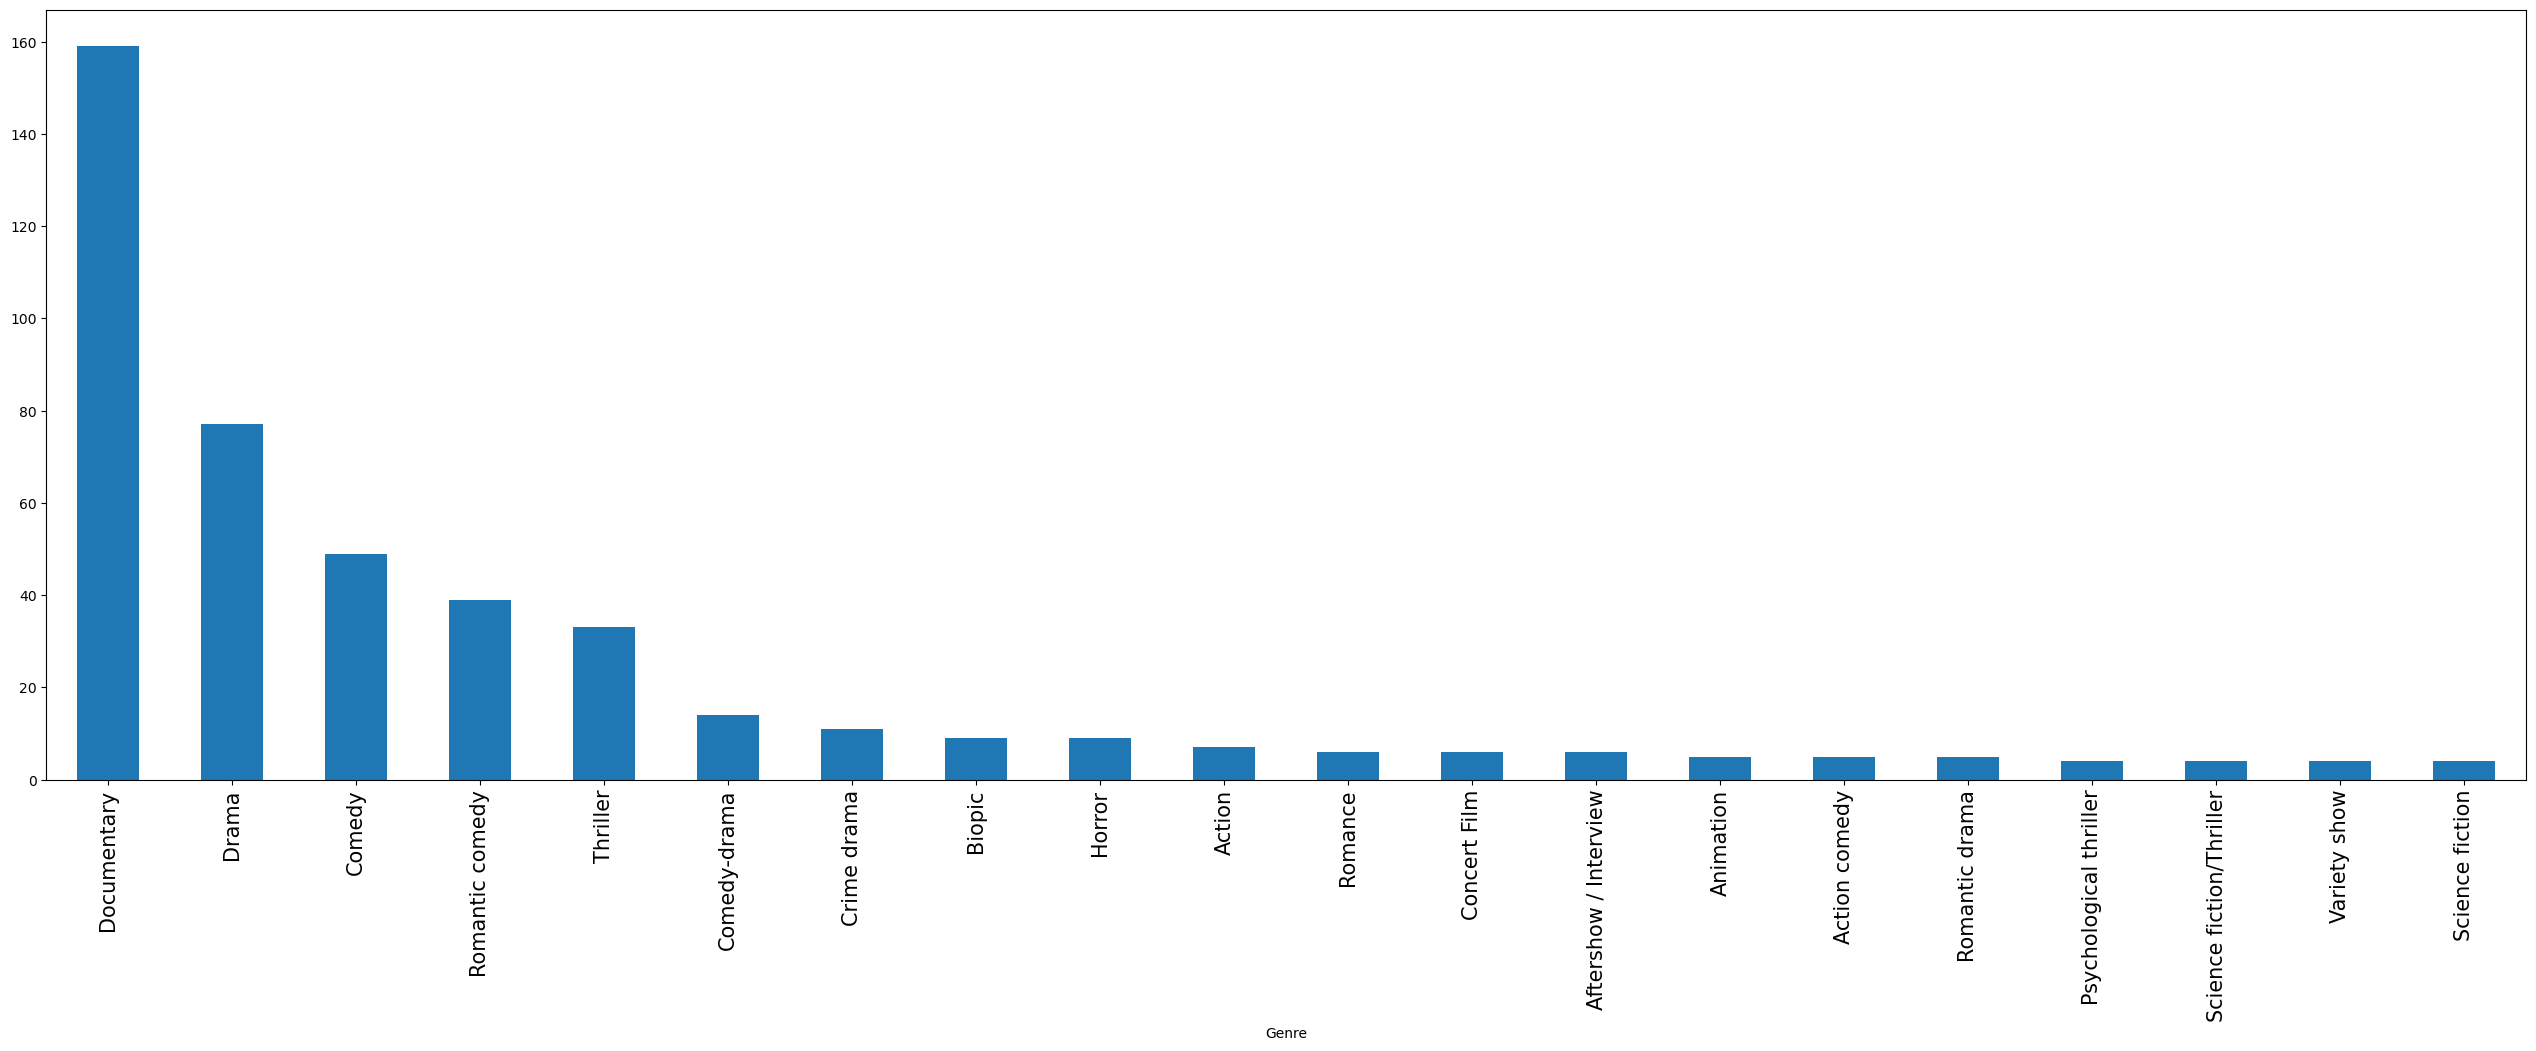

In [158]:
g = df.Genre.value_counts()[:20]
plt.figure(figsize = (32,10))
plt.xticks(rotation=90, size=15)  

g.plot(kind='bar')

### 평점높은 장르 순위

In [15]:
genre_10 = df.sort_values("IMDB Score", ascending = False)[['Title','Genre', 'IMDB Score','year']][0:10]
genre_10 

,Title,Genre,IMDB Score,year
583,David Attenborough: A Life on Our Planet,Documentary,9.0,2020
582,Emicida: AmarElo - It's All For Yesterday,Documentary,8.6,2020
581,Springsteen on Broadway,One-man show,8.5,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,8.4,2015
579,Taylor Swift: Reputation Stadium Tour,Concert Film,8.4,2018
578,Ben Platt: Live from Radio City Music Hall,Concert Film,8.4,2020
577,Dancing with the Birds,Documentary,8.3,2019
576,Cuba and the Cameraman,Documentary,8.3,2017
573,Klaus,Animation/Christmas/Comedy/Adventure,8.2,2019
571,13th,Documentary,8.2,2016


<Axes: xlabel='IMDB Score', ylabel='Genre'>

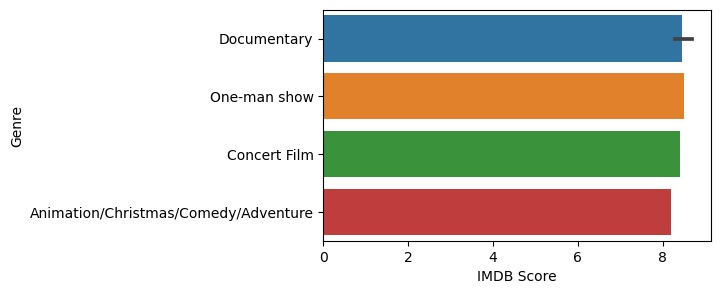

In [16]:
plt.figure(figsize = (5,3))
sns.barplot(data=genre_10, x = 'IMDB Score', y = 'Genre')

### 언어 탑10

<Axes: ylabel='Language'>

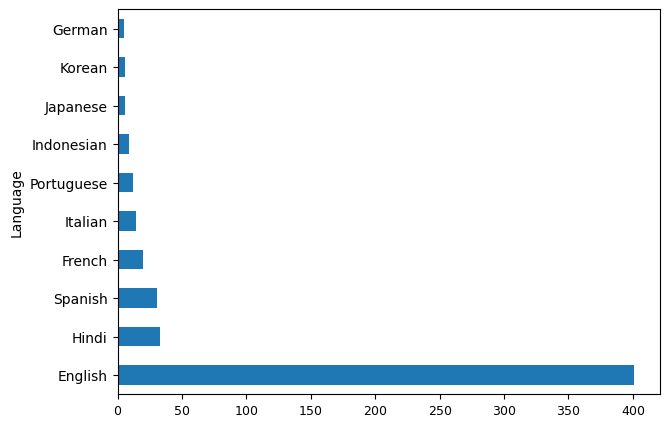

In [155]:
plt.figure(figsize = (7,5))
plt.xticks(rotation=0, size=9)  
df.Language.value_counts().iloc[:10].plot(kind='barh')

### 평점 높은 작품 탑10

In [157]:
df.sort_values(['IMDB Score'], ascending = False)[0:10]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,day of week,month_map
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,10,2020,6,4,Sun,Oct
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,12,2020,1,8,Tues,Dec
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,12,2018,6,16,Sun,Dec
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,10,2015,4,9,Fri,Oct
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,12,2018,0,31,Mon,Dec
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,5,2020,2,20,Wed,May
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,10,2019,2,23,Wed,Oct
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,11,2017,4,24,Fri,Nov
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English,11,2019,4,15,Fri,Nov
571,13th,Documentary,2016-10-07,100,8.2,English,10,2016,4,7,Fri,Oct


<Axes: xlabel='IMDB Score', ylabel='Title'>

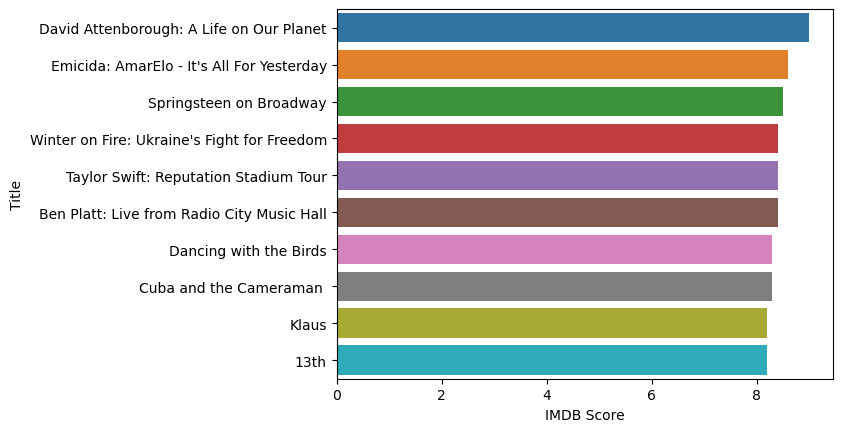

In [156]:
rate_10 = df.sort_values(['IMDB Score'], ascending = False)[0:10]
sns.barplot(data = rate_10, x= 'IMDB Score', y='Title')

### 영어 작품 탑10

In [19]:
eng_rate =df[df["Language"] == "English"][["Title","Genre","IMDB Score"]].sort_values(by= "IMDB Score", ascending=False).iloc[:10]
eng_rate

,Title,Genre,IMDB Score
583,David Attenborough: A Life on Our Planet,Documentary,9.0
581,Springsteen on Broadway,One-man show,8.5
579,Taylor Swift: Reputation Stadium Tour,Concert Film,8.4
578,Ben Platt: Live from Radio City Music Hall,Concert Film,8.4
577,Dancing with the Birds,Documentary,8.3
576,Cuba and the Cameraman,Documentary,8.3
574,Seaspiracy,Documentary,8.2
573,Klaus,Animation/Christmas/Comedy/Adventure,8.2
572,Disclosure: Trans Lives on Screen,Documentary,8.2
571,13th,Documentary,8.2


### 한국어 작품 탑10

In [20]:
kor_rate = df[df["Language"] == "Korean"][["Title","Genre","IMDB Score"]].sort_values(by= "IMDB Score", ascending=False)
kor_rate

,Title,Genre,IMDB Score
533,Blackpink: Light Up the Sky,Documentary,7.5
382,Night in Paradise,Drama,6.7
358,Space Sweepers,Science fiction,6.6
288,Time to Hunt,Thriller,6.3
18,What Happened to Mr. Cha?,Comedy,4.3
11,The Call,Drama,4.1


In [78]:
kor_rate = df[(df["Language"] == "English") & (df["year"] == 2020)][["Title","Genre","IMDB Score"]].sort_values(by= "IMDB Score", ascending=False)[:10]
kor_rate

,Title,Genre,IMDB Score
583,David Attenborough: A Life on Our Planet,Documentary,9.0
578,Ben Platt: Live from Radio City Music Hall,Concert Film,8.4
572,Disclosure: Trans Lives on Screen,Documentary,8.2
570,Rising Phoenix,Documentary,8.1
569,My Octopus Teacher,Documentary,8.1
563,A Secret Love,Documentary,7.9
562,The Trial of the Chicago 7,Drama,7.8
560,If Anything Happens I Love You,Animation / Short,7.8
555,Crip Camp: A Disability Revolution,Documentary,7.7
548,The Social Dilemma,Documentary,7.6


In [21]:
hindi_rate = df[df["Language"] == "Hindi"][["Title","Genre","IMDB Score"]].sort_values(by= "IMDB Score", ascending=False)
hindi_rate

,Title,Genre,IMDB Score
551,Yeh Ballet,Drama,7.6
543,Ludo,Anthology/Dark comedy,7.6
509,Raat Akeli Hai,Thriller,7.3
491,Soni,Crime drama,7.2
486,Love per Square Foot,Romantic comedy,7.2
423,Pagglait,Comedy-drama,6.9
413,AK vs AK,Thriller,6.9
405,Serious Men,Drama,6.8
397,Long Live Brij Mohan,Comedy,6.8
388,Upstarts,Drama,6.7


In [22]:
df[df["Language"] == "English/Korean"][["Title","Genre","IMDB Score"]].sort_values(by= "IMDB Score", ascending=False)

,Title,Genre,IMDB Score
507,Okja,Action-adventure,7.3


In [23]:
df[df["Language"] == "Thai"][["Title","Genre","IMDB Score"]].sort_values(by= "IMDB Score", ascending=False)

,Title,Genre,IMDB Score
151,One Take,Documentary,5.7
71,Ghost Lab,Horror,5.2


In [24]:
### 평점 8점 이상 작품

<Axes: xlabel='IMDB Score', ylabel='Title'>

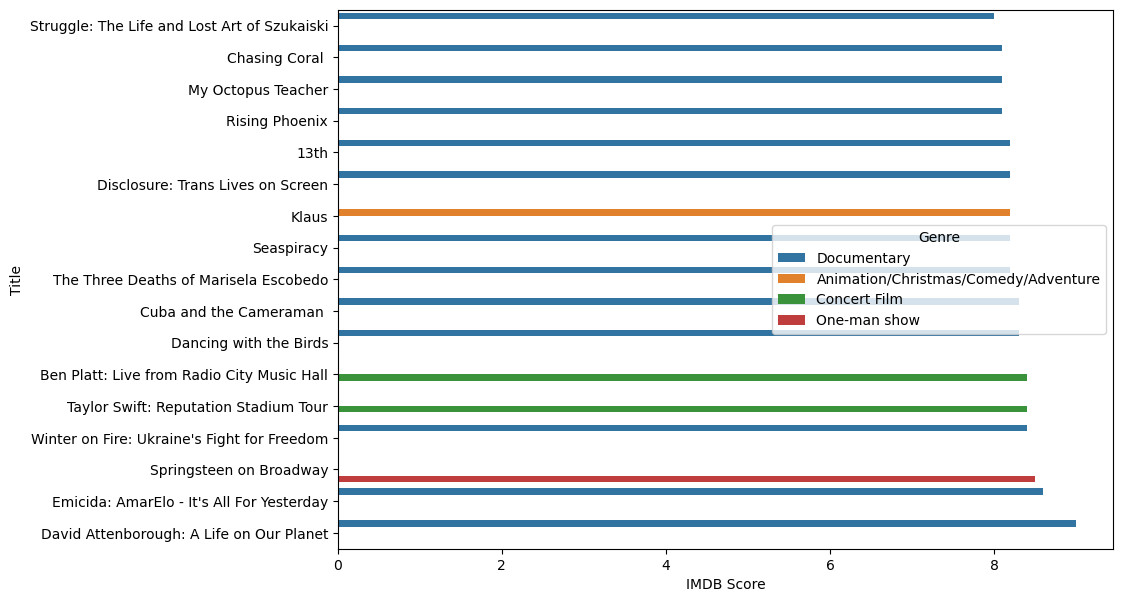

In [25]:
rate_8 = df[df['IMDB Score']>=8]

plt.figure(figsize = (10,7))
sns.barplot(data = rate_8, x = 'IMDB Score', y = 'Title',hue ='Genre')

In [26]:
### 평점 4점 이하 작품

<Axes: xlabel='IMDB Score', ylabel='Title'>

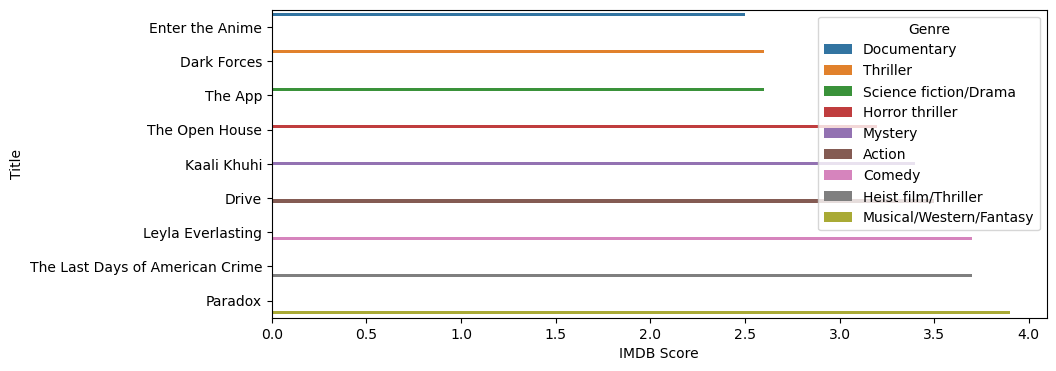

In [27]:
rate_4 = df[df['IMDB Score']<=4]

plt.figure(figsize = (10,4))
sns.barplot(data = rate_4, x = 'IMDB Score', y = 'Title',hue ='Genre')

In [28]:
### 연도별 작품 수 

<Axes: xlabel='year', ylabel='count'>

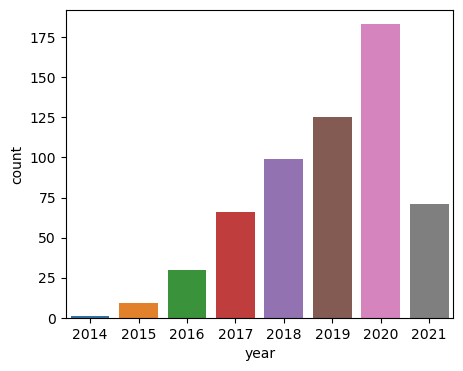

In [29]:
plt.figure(figsize = (5,4))
sns.countplot(
    data=df,
    x="year"
)

In [30]:
### 연도별 평점 추이

<Axes: xlabel='year', ylabel='IMDB Score'>

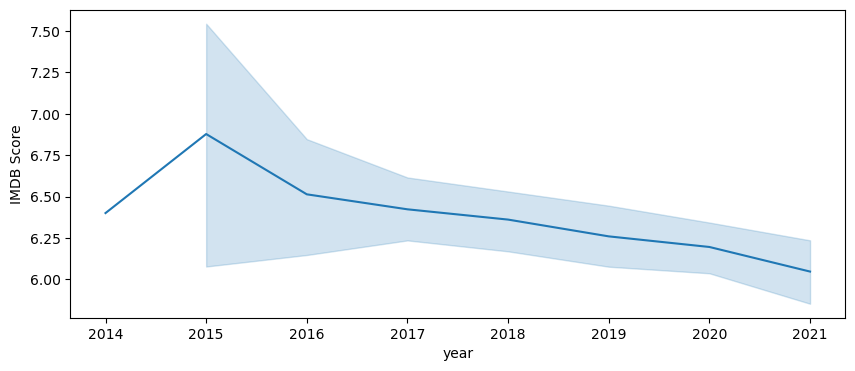

In [31]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year',y='IMDB Score',data=df)

In [32]:
### 요일별 작품 개봉

<Axes: xlabel='day of week', ylabel='count'>

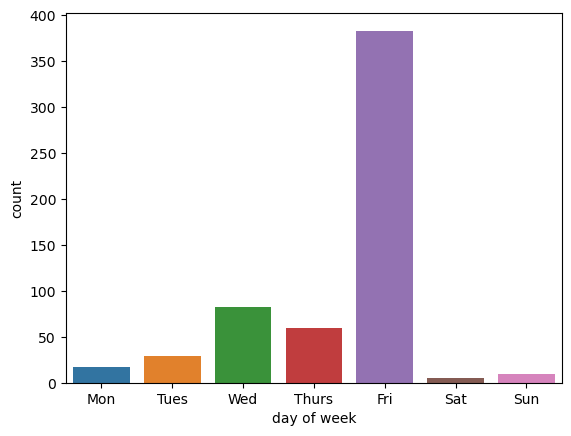

In [33]:
bar_order = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
sns.countplot(x='day of week',data=df ,order=bar_order) 

In [34]:
### 월별 작품 개봉 수

<Axes: xlabel='month_map', ylabel='count'>

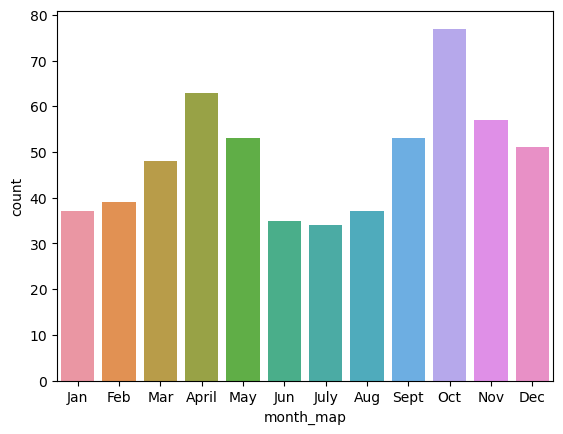

In [35]:
bar_order = ['Jan','Feb','Mar','April','May','Jun','July','Aug','Sept','Oct','Nov','Dec']
sns.countplot(x='month_map',data=df ,order=bar_order) 

In [137]:
random.seed(100)
labels = ['', 'B', 'C']
fig = plt.figure()
fig.set_facecolor('white')
for _, label in enumerate(labels):    
    x = df[year]  
    y = df[year].value_counts()   
sns.lineplot(x=x, y=y, label=label)
plt.legend()

NameError: name 'random' is not defined

In [165]:
df.groupby('Genre')[["Title"]]

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [170]:
df[["IMDB Score"]].groupby(df["Genre"])

In [36]:
### 2019년 작품 탑10

In [37]:
year_rate = df[df["year"] == 2019][["Title","IMDB Score","Genre"]].sort_values(by= "IMDB Score", ascending=False)[:10]
year_rate

,Title,IMDB Score,Genre
577,Dancing with the Birds,8.3,Documentary
573,Klaus,8.2,Animation/Christmas/Comedy/Adventure
565,Marriage Story,7.9,Drama
561,The Irishman,7.8,Crime drama
554,Brene Brown: The Call to Courage,7.7,Documentary
552,Anima,7.7,Musical / Short
549,The Two Popes,7.6,Drama
546,Tell Me Who I Am,7.6,Documentary
545,Rolling Thunder Revue: A bob Dylan Story by Ma...,7.6,Documentary
539,John Mulaney & the Sack Lunch Bunch,7.5,Variety show


In [38]:
### 2020 작품 탑10

In [39]:
year_rate = df[df["year"] == 2020][["Title","IMDB Score","Genre"]].sort_values(by= "IMDB Score", ascending=False)[:10]
year_rate

,Title,IMDB Score,Genre
583,David Attenborough: A Life on Our Planet,9.0,Documentary
582,Emicida: AmarElo - It's All For Yesterday,8.6,Documentary
578,Ben Platt: Live from Radio City Music Hall,8.4,Concert Film
575,The Three Deaths of Marisela Escobedo,8.2,Documentary
572,Disclosure: Trans Lives on Screen,8.2,Documentary
570,Rising Phoenix,8.1,Documentary
569,My Octopus Teacher,8.1,Documentary
563,A Secret Love,7.9,Documentary
562,The Trial of the Chicago 7,7.8,Drama
560,If Anything Happens I Love You,7.8,Animation / Short


In [40]:
### 2021 작품 탑10

In [41]:
year_rate = df[df["year"] == 2021][["Title","IMDB Score","Genre"]].sort_values(by= "IMDB Score", ascending=False)[:10]
year_rate

,Title,IMDB Score,Genre
574,Seaspiracy,8.2,Documentary
493,The Disciple,7.2,Drama
477,The White Tiger,7.1,Drama
475,The Dig,7.1,Drama
470,Pieces of a Woman,7.1,Drama
461,Ferry,7.1,Crime drama
441,Pele,7.0,Documentary
440,Operation Varsity Blues: The College Admission...,7.0,Documentary
423,Pagglait,6.9,Comedy-drama
416,Biggie: I Got a Story to Tell,6.9,Documentary


In [42]:
### 공포영화 시즌

In [43]:
scary_movie = df[(df["Genre"]=="Thriller") | (df["Genre"]=="Horror") | (df["Genre"]=="Zombie/Heist")][["Title","month","Language","IMDB Score"]]
scary_movie

,Title,month,Language,IMDB Score
1,Dark Forces,8,Spanish,2.6
14,Mercy,11,English,4.2
21,Secret Obsession,7,English,4.4
23,The Girl on the Train,2,Hindi,4.4
25,Fatal Affair,7,English,4.5
31,I Am the Pretty Thing That Lives in the House,10,English,4.6
34,Rattlesnake,10,English,4.6
43,Christmas Crossfire,12,German,4.8
45,Mrs. Serial Killer,5,Hindi,4.8
46,Nobody Sleeps in the Woods Tonight,10,Polish,4.8


In [44]:
df[(df["Genre"]=="Psychological thriller") |(df["Genre"]=="Horror-thriller")|(df["Genre"]=="Horror thriller")][["Title","month","Language","IMDB Score"]]

,Title,month,Language,IMDB Score
3,The Open House,1,English,3.2
19,Death Note,8,English,4.4
157,The Woman in the Window,5,English,5.7
240,The Perfection,5,English,6.1
265,Apostle,10,English,6.3
331,Gerald's Game,9,English,6.5
347,Bird Box,12,English,6.6
352,I'm Thinking of Ending Things,9,English,6.6
474,The Devil All the Time,9,English,7.1


In [45]:
family_movie = df[(df["Genre"]=="Family") | (df["Genre"]=="Family film")][["Title","month","Language"]]
family_movie

,Title,month,Language
52,Holiday Rush,11,English
144,Dad Wanted,9,Spanish
225,Finding 'Ohana,1,English
266,Benji,3,English


In [46]:
romcom_movie = df[(df["Genre"]=="Romantic comedy") | (df["Genre"]=="Romance")][["Title","month","Language"]]
romcom_movie

,Title,month,Language
12,Whipped,9,Indonesian
26,Just Say Yes,4,Dutch
58,Squared Love,2,Polish
67,Desperados,7,English
84,A Christmas Prince: The Royal Wedding,11,English
91,"To Each, Her Own",6,French
95,A Christmas Prince: The Royal Baby,12,English
105,The Princess Switch: Switched Again,11,English
114,Love Wedding Repeat,4,English
121,The Knight Before Christmas,11,English


In [47]:
doc = df[(df["Genre"]=="Documentary") & (df["year"]==2020)][["Title","IMDB Score","month"]]
doc

,Title,IMDB Score,month
36,We Are One,4.6,7
151,One Take,5.7,6
292,Anelka: Misunderstood,6.4,8
301,John Was Trying to Contact Aliens,6.4,8
303,Murder to Mercy: The Cyntoia Brown Story,6.4,4
357,Shawn Mendes: In Wonder,6.6,11
373,Giving Voice,6.7,12
375,Hope Frozen: A Quest to Live Twice,6.7,9
392,A Life of Speed: The Juan Manuel Fangio Story,6.8,3
393,A Love Song for Latasha,6.8,9


### 연속형 데이터 - Runtime

In [48]:
df["Runtime"].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

Text(0.5, 0, 'Runtime')

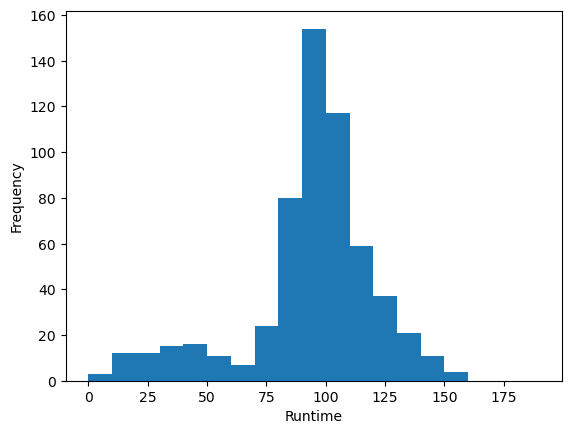

In [49]:
df['Runtime'].plot(
    kind="hist",
    bins=np.arange(0,200,10)
)
plt.xlabel('Runtime')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


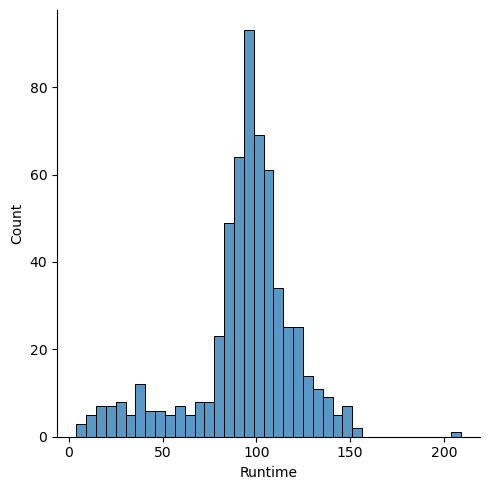

In [50]:
sns.displot(df['Runtime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x232ab014410>,
 'caps': [<matplotlib.lines.Line2D at 0x232a87c1510>,
 'boxes': [<matplotlib.lines.Line2D at 0x232ac0a9890>],
 'medians': [<matplotlib.lines.Line2D at 0x232ac0b4d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x232ac0b4190>],
 'means': []}

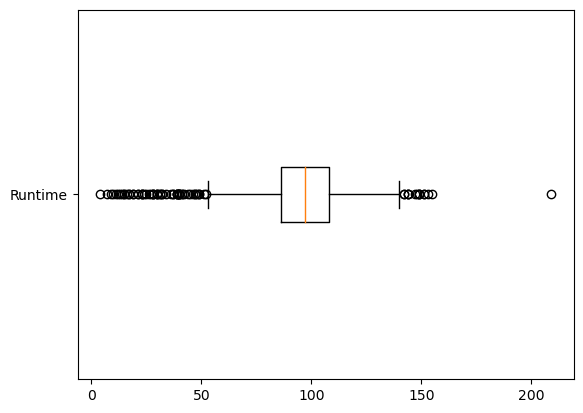

In [51]:
plt.boxplot(df['Runtime'], labels=['Runtime'], vert=False)

### 연속형 데이터- IMDB Score

In [52]:
df["IMDB Score"].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

Text(0.5, 0, 'IMDB Score')

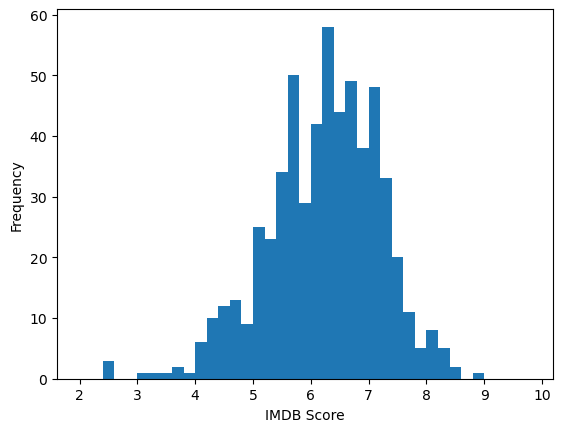

In [53]:
df["IMDB Score"].plot(
    kind="hist",
    bins=np.arange(2,10,0.2)
)
plt.xlabel("IMDB Score")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


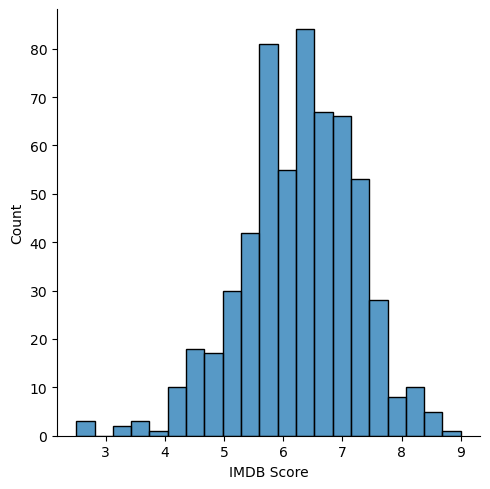

In [54]:
sns.displot(df['IMDB Score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x232a8677450>,
 'caps': [<matplotlib.lines.Line2D at 0x232ac285390>,
 'boxes': [<matplotlib.lines.Line2D at 0x232ac273350>],
 'medians': [<matplotlib.lines.Line2D at 0x232ac286910>],
 'fliers': [<matplotlib.lines.Line2D at 0x232ac2873d0>],
 'means': []}

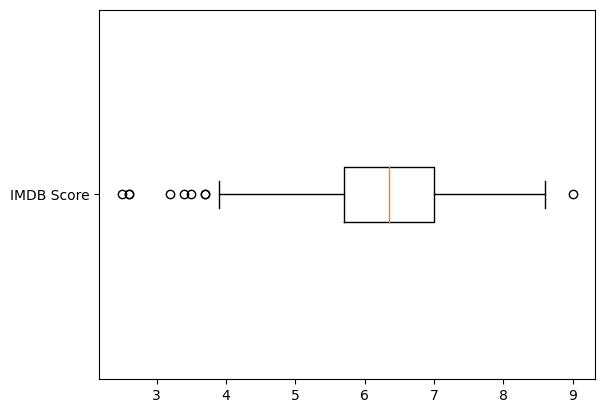

In [55]:
plt.boxplot(df['IMDScore'], labels=['IMDB Score'], vert=False)

### 평점 & 런타임 상관관계

<Axes: xlabel='IMDB Score', ylabel='Runtime'>

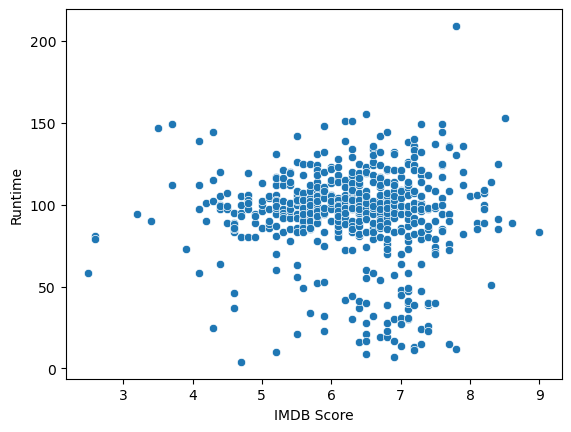

In [56]:
rate_time =df[['Runtime','IMDB Score']]

sns.scatterplot(data=rate_time, x='IMDB Score', y='Runtime')

<Axes: >

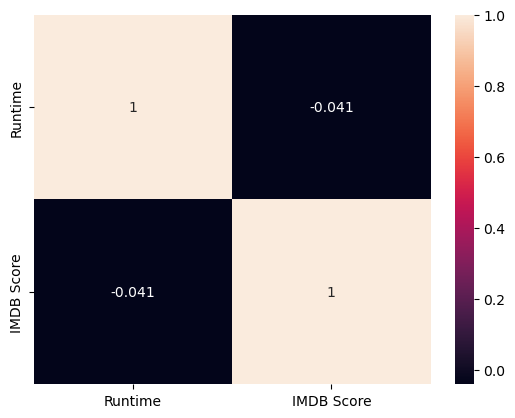

In [57]:
sns.heatmap(rate_time.corr(), annot = True)

### 데이터 pairplot 그려보기

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


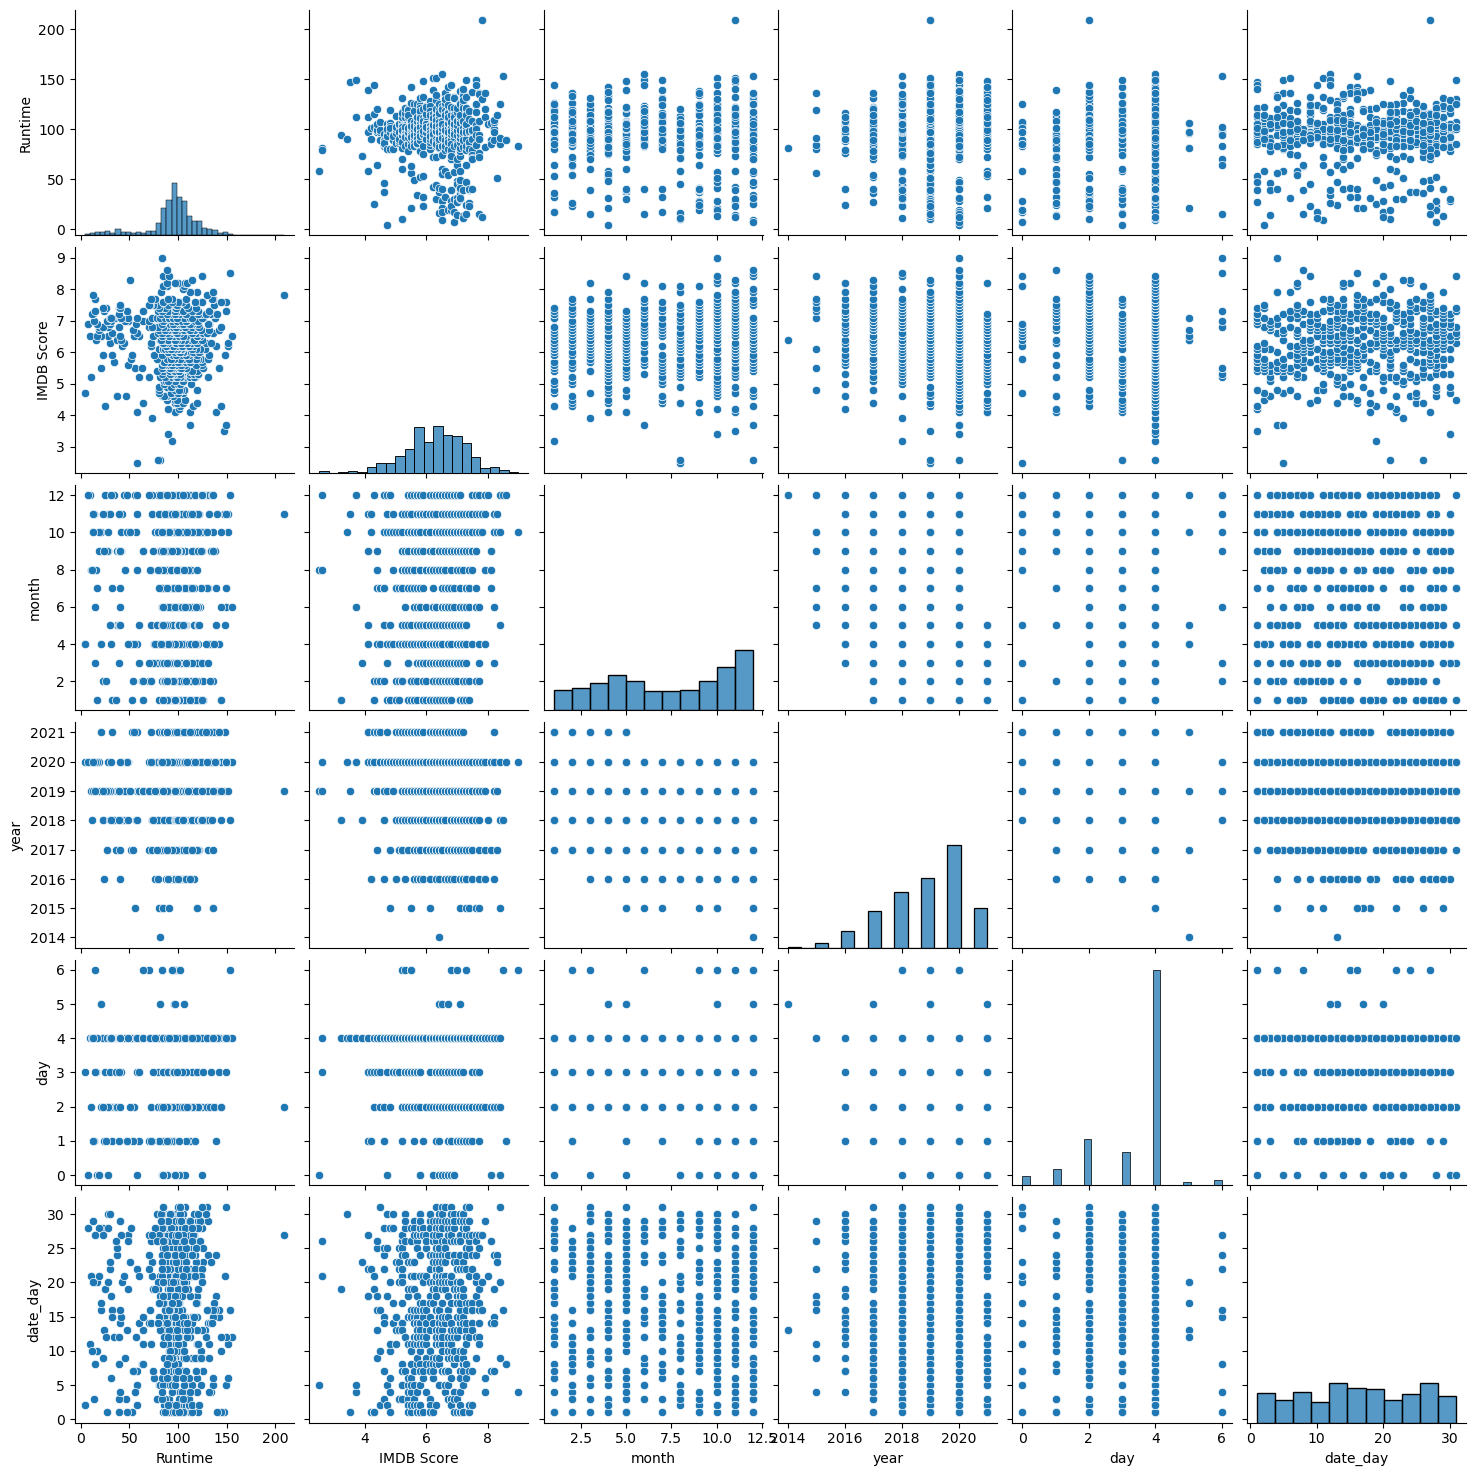

In [129]:

sns.pairplot(df)

In [ ]:
plt.boxplot(df['Runtime'], labels=['IMDB Score'], vert=False)

<Axes: >

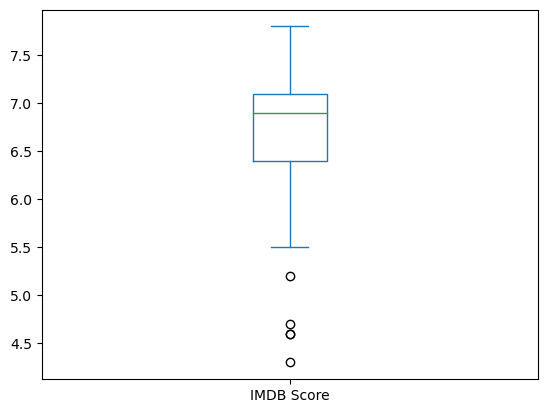

In [130]:
df[df["Runtime"]<= 50]["IMDB Score"].plot(kind="box")

<Axes: >

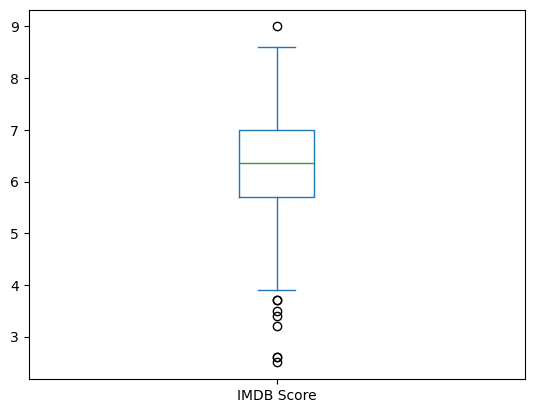

In [131]:
df[df["Runtime"]>50 & (df["Runtime"] <= 100)]["IMDB Score"].plot(kind="box")

In [135]:
df[df["Runtime"] <= 50]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,month,year,day,date_day,day of week,month_map
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,12,2019,3,19,Thurs,Dec
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,5,2019,4,24,Fri,May
33,Porta dos Fundos: The First Temptation of Christ,Comedy,2019-12-03,46,4.6,Portuguese,12,2019,1,3,Tues,Dec
40,Sol Levante,Anime / Short,2020-04-02,4,4.7,English,4,2020,3,2,Thurs,April
66,American Factory: A Conversation with the Obamas,Aftershow / Interview,2019-08-21,10,5.2,English,8,2019,2,21,Wed,Aug
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English,10,2019,2,16,Wed,Oct
133,Sarah Cooper: Everything's Fine,Variety show,2020-10-27,49,5.6,English,10,2020,1,27,Tues,Oct
152,"Out of Many, One",Documentary,2018-12-12,34,5.7,English,12,2018,2,12,Wed,Dec
197,"Frankenstein's Monster's Monster, Frankenstein",Mockumentary,2019-07-16,32,5.9,English,7,2019,1,16,Tues,July
199,Notes from Dunblane: Lesson from a School Shoo...,Documentary,2018-09-28,23,5.9,English,9,2018,4,28,Fri,Sept


In [59]:
df.groupby(["Language"])[["IMDB Score", "Runtime"]].mean()

,IMDB Score,Runtime
Language,,
Bengali,7.100000,41.000000
Dutch,5.800000,99.666667
English,6.380050,91.817955
English/Akan,7.700000,136.000000
English/Arabic,7.300000,114.000000
English/Hindi,7.300000,32.500000
English/Japanese,4.400000,89.000000
English/Korean,7.300000,121.000000
English/Mandarin,7.050000,59.000000


## Insight

<의외인 점>

- 힌디어 2위 => 인구수, 자본에 근거했을 것이다

- 영어작품에 다큐가 대부분, 근데 한국은 드라마가 강세 => 아무래도 문화적 차이가 아닌가...다양한 걸 시도하는 문화? 아니면 자본일 수도..
        -> 혹시,,,,서양권은 불륜과 같은 주제에 별 감흥?이 없어서 그런 게 아닌가
        -> 문화적 차이가 맞는듯ㅇㅇ(+기사 첨부하면 좋을 듯)
        
- 요일 => 금요일에 많이 개봉하는 이유? -> 미국 기준으로 하면 토요일이긴 함

- 아쉬운점 -> 2년 전에 업데이트가 끝난 데이터라 한국 데이터가 너무 부족함ㅠ

- 호러 => 한국 기준으로 여름(6-8월)에 많이 나올 거라고 예상했는데 10월에 가장 많았음
        -> 서양은 할로윈을 챙기니까 10월에 호러 영화가 많이 나온게 아닌가 예상함
        

- 개봉작 수 => 20년에비해 21년에 개봉한 작품수는 절반 이상 차이남 -> 21년 6월까지 집계한 데이터라 하반기 개봉은 들어가지 않았음(근데 그래도 20년 개봉수는 못 따라갈 듯?)


- 장르 => 서양권은 다큐가 많고, 보수국가에서는 드라마가 많다 -> 약간 도파민에 중독되다 못해 절여진 뇌 때문이지 않을까..자극적인 주제에 대한 문화적 차이이지 않을까 예상함


- 공중파에서는 내보내지 못하는 제약사항들이 OTT 플랫폼에서는 제약사항이 희미해지기때문에 그런게 아닐까-

## T-test

<T-test 주제>

(1-1) 19년도와 20년도 런타임 평균 차이 -> 차이가 있다 (20년도에 작품 수가 많아서, 코로나 장기화 때문에? )

(1-2) 19년도와 20년도 점수 평균 차이 -> 차이가 없다  ()

(2-1) 영어 - 힌디 점수 평균 차이 -> 차이가 있다

(2-2) 영어 - 힌디 런타임 평균 차이 -> 차이가 있다

(3-1) 다큐 - 드라마 런타임/점수 평균 차이 -> 차이가 있다

(3-2) 상/하반기 점수 평균 차이 -> 차이가 없다

### two-sample_t_test로 English & Hindi 그룹의 평점 평균 차이 추정하기

In [107]:
df.groupby(["Language"])[["IMDB Score"]].mean()

,IMDB Score
Language,
Bengali,7.100000
Dutch,5.800000
English,6.380050
English/Akan,7.700000
English/Arabic,7.300000
English/Hindi,7.300000
English/Japanese,4.400000
English/Korean,7.300000
English/Mandarin,7.050000


In [108]:
df[(df["Language"] == "English")][["IMDB Score"]].mean()

IMDB Score    6.38005
dtype: float64

In [109]:
df[(df["Language"] == "Hindi")][["IMDB Score"]].mean()

IMDB Score    5.981818
dtype: float64

## (2-1)

$$H0$$ 귀무가설: 영어로 제작된 넷플릭스 작품의 IMDB Score 평균과 힌디어로 제작된 넷플릭스 작품의 IMDB Score 평균 차이는 0이다.
    
$$Ha$$ 대립가설: 영어로 제작된 넷플릭스 작품의 IMDB Score 평균과 힌디어로 제작된 넷플릭스 작품의 IMDB Score 평균 차이는 0이 아니다.

### 등분산으로 두 집단의 분산이 같은지 확인

In [88]:
!pip install scipy
from scipy import stats

test_names = ["IMDB Score"]

eng_scores = df[df["Language"] == "English"][["IMDB Score"]]
hindi_scores = df[df["Language"] == "Hindi"][["IMDB Score"]]

Defaulting to user installation because normal site-packages is not writeable


In [90]:
for test_name in test_names:
    statistic, pvalue = stats.levene(eng_scores[test_name], hindi_scores[test_name])
    if pvalue > 0.05:
        print(f"{test_name} pvalue: {pvalue} 등분산 가정 만족")
    else:
        print(f"{test_name} pvalue: {pvalue} 이분산 가정 만족")

IMDB Score pvalue: 0.12650211988004256 등분산 가정 만족


### 양측검정 t-test

In [91]:
for test_name in test_names:  
    t_statistic, pvalue = stats.ttest_ind(      
    a = eng_scores[test_name],
    b = hindi_scores[test_name],
        alternative = "two-sided",    
        equal_var = True             
    )
    if pvalue < 0.05:
        print(test_name, pvalue, "귀무가설 기각")
    else:
        print(test_name, pvalue, "귀무가설 기각 불가")

IMDB Score 0.018069971076977442 귀무가설 기각


In [92]:
# 단측검정 ttest
for test_name in test_names:
    t_statistic, pvalue = stats.ttest_ind(     
    a = eng_scores[test_name],
    b = hindi_scores[test_name],
        alternative = "greater",    # 단측검정 (a > b)
        equal_var = True           
    )
    if pvalue < 0.05:
        print(test_name, pvalue, "귀무가설 기각")
    else:
        print(test_name, pvalue, "귀무가설 기각 불가")

IMDB Score 0.009034985538488721 귀무가설 기각


### => 영어 작품의 평균 점수는 힌디어 작품의 평균 점수보다 같지 않고 통계적으로 유의하게 더 높다 

## (2-2)

$$H0$$ 귀무가설: 영어로 제작된 넷플릭스 작품의 Runtime 평균과 힌디어로 제작된 넷플릭스 작품의 Runtime 평균 차이는 0이다.
    
$$Ha$$ 대립가설: 영어로 제작된 넷플릭스 작품의 Runtime 평균과 힌디어로 제작된 넷플릭스 작품의 Runtime 평균 차이는 0이 아니다.

In [112]:
df[(df["Language"] == "English")][["Runtime"]].mean()

Runtime    91.817955
dtype: float64

In [113]:
df[(df["Language"] == "Hindi")][["Runtime"]].mean()

Runtime    115.787879
dtype: float64

In [93]:
test_names = ["Runtime"]

eng_runtime = df[df["Language"] == "English"][["Runtime"]]
hindi_runtime = df[df["Language"] == "Hindi"][["Runtime"]]

In [94]:
for test_name in test_names:
    statistic, pvalue = stats.levene(eng_runtime[test_name], hindi_runtime[test_name])
    if pvalue > 0.05:
        print(f"{test_name} pvalue: {pvalue} 등분산 가정 만족")
    else:
        print(f"{test_name} pvalue: {pvalue} 이분산 가정 만족")

Runtime pvalue: 0.10865288787617979 등분산 가정 만족


In [96]:
for test_name in test_names:  
    t_statistic, pvalue = stats.ttest_ind(      
    a = eng_runtime[test_name],
    b = hindi_runtime[test_name],
        alternative = "two-sided",    
        equal_var = True             
    )
    if pvalue < 0.05:
        print(test_name, pvalue, "귀무가설 기각")
    else:
        print(test_name, pvalue, "귀무가설 기각 불가")

Runtime 2.6701178942994375e-06 귀무가설 기각


In [97]:
# 단측검정 ttest
for test_name in test_names:
    t_statistic, pvalue = stats.ttest_ind(     
    a = hindi_runtime[test_name],
    b = eng_runtime[test_name],
        alternative = "greater",    # 단측검정 (a > b)
        equal_var = True         
    )
    if pvalue < 0.05:
        print(test_name, pvalue, "귀무가설 기각")
    else:
        print(test_name, pvalue, "귀무가설 기각 불가")

Runtime 1.3350589471497188e-06 귀무가설 기각


### => 힌디어 작품의 런타임 평균은 영어 작품의 런타임 평균과 같지 않고 유의하게 더 높다

## (4-1)

$$H0$$ 귀무가설: 영어로 제작된 다큐멘터리 작품의 IMDB Score 평균과 힌디어로 제작된 드라마 작품의 IMDB Score 평균 차이는 0이다.
    
$$Ha$$ 대립가설: 영어로 제작된 다큐멘터리 작품의 IMDB Score 평균과 힌디어로 제작된 드라마 작품의 IMDB Score 평균 차이는 0이 아니다.

In [114]:
df[(df["Language"] == "English") & (df["Genre"] == "Documentary")][["IMDB Score"]].mean()

IMDB Score    7.016667
dtype: float64

In [115]:
df[(df["Language"] == "Hindi") & (df["Genre"] == "Drama")][["IMDB Score"]].mean()

IMDB Score    6.276923
dtype: float64

In [101]:
test_names = ["IMDB Score"]

doc_scores = df[(df["Language"] == "English") & (df["Genre"] == "Documentary")][["IMDB Score"]]
drama_scores = df[(df["Language"] == "Hindi") & (df["Genre"] == "Drama")][["IMDB Score"]]

In [102]:
for test_name in test_names:
    statistic, pvalue = stats.levene(doc_scores[test_name], drama_scores[test_name])
    if pvalue > 0.05:
        print(f"{test_name} pvalue: {pvalue} 등분산 가정 만족")
    else:
        print(f"{test_name} pvalue: {pvalue} 이분산 가정 만족")

IMDB Score pvalue: 0.9000617830173057 등분산 가정 만족


In [103]:
for test_name in test_names:  
    t_statistic, pvalue = stats.ttest_ind(      
    a = doc_scores[test_name],
    b = drama_scores[test_name],
        alternative = "two-sided",    
        equal_var = True             
    )
    if pvalue < 0.05:
        print(test_name, pvalue, "귀무가설 기각")
    else:
        print(test_name, pvalue, "귀무가설 기각 불가")

IMDB Score 0.0005633622824446992 귀무가설 기각


In [106]:
# 단측검정 ttest
for test_name in test_names:
    t_statistic, pvalue = stats.ttest_ind(     
    a = doc_scores[test_name],
    b = drama_scores[test_name],
        alternative = "greater",    # 단측검정 (a > b)
        equal_var = True         
    )
    if pvalue < 0.05:
        print(test_name, pvalue, "귀무가설 기각")
    else:
        print(test_name, pvalue, "귀무가설 기각 불가")

IMDB Score 0.0002816811412223496 귀무가설 기각


### => 영어 다큐멘터리 작품의 점수 평균은 힌디어 드라마 작품의 점수 평균과 같지 않고 유의하게 더 높다